## Step 5 - Evaluate Model - Task 3 - Evaluate Forecasting - CLASS ASSIGNMENT


###Load Libraries


In [1]:
!pip install statsmodels --upgrade

In [2]:
import pandas as pd

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Set up environment and connect to Google Drive

In [3]:
using_Google_colab = False
using_Anaconda_on_Mac_or_Linux = True
using_Anaconda_on_windows = False

In [4]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

## EM3.1 Open Notebook titled “Step-5-Task-3-Evaluate-Forecasting” and upload the state 

### Upload State level Data


In [5]:
if using_Google_colab:             
    df_abt_by_state = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/abt_by_state.csv',
                                  index_col=['Date'], parse_dates=['Date'])
if using_Anaconda_on_Mac_or_Linux:
    df_abt_by_state = pd.read_csv('../output/abt_by_state.csv',
                                  index_col=['Date'], parse_dates=['Date'])
if using_Anaconda_on_windows:
    df_abt_by_state = pd.read_csv('..\output\abt_by_state.csv',
                                  index_col=['Date'], parse_dates=['Date'])
df_abt_by_state

,Unnamed: 0,State,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,,
2020-01-22,0,AL,1,0,NaN,NaN,0,NaN,NaN
2020-01-23,1,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-24,2,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-25,3,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-26,4,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-27,5,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-28,6,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-29,7,AL,1,0,0.0,0.000000,0,0.0,0.000000
2020-01-30,8,AL,1,0,0.0,0.000000,0,0.0,0.000000


###Filter Data to a specific state (e.g., NJ)

In [6]:
df_abt_chosen_state = df_abt_by_state[df_abt_by_state['State'] == 'NJ']
df_abt_chosen_state = df_abt_chosen_state.dropna()
df_abt_chosen_state

,Unnamed: 0,State,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,,
2020-01-29,8357,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-01-30,8358,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-01-31,8359,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-01,8360,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-02,8361,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-03,8362,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-04,8363,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-05,8364,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-06,8365,NJ,34,0,0.0,0.000000,0,0.0,0.000000


### Compute Weekly Summaries

In [7]:
df_abt_chosen_state_weekly = df_abt_chosen_state.resample('W').sum()
df_abt_chosen_state_weekly


,Unnamed: 0,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,
2020-02-02,41795,170,0,0.0,0.000000,0,0.0,0.000000
2020-02-09,58555,238,0,0.0,0.000000,0,0.0,0.000000
2020-02-16,58604,238,0,0.0,0.000000,0,0.0,0.000000
2020-02-23,58653,238,0,0.0,0.000000,0,0.0,0.000000
2020-03-01,58702,238,0,0.0,0.000000,0,0.0,0.000000
2020-03-08,58751,238,13,5.0,1.857143,0,0.0,0.000000
2020-03-15,58800,238,310,93.0,42.428571,8,2.0,1.142857
2020-03-22,58849,238,5733,1816.0,774.714286,71,22.0,9.000000
2020-03-29,58898,238,50306,11472.0,6367.571429,622,137.0,78.714286


### Normalize data

In [8]:
state_covid_cases = df_abt_chosen_state_weekly['Incremental Cases']
cases_max = state_covid_cases.max()
state_covid_cases = state_covid_cases/cases_max


In [9]:
sd =seasonal_decompose(state_covid_cases,freq=7)

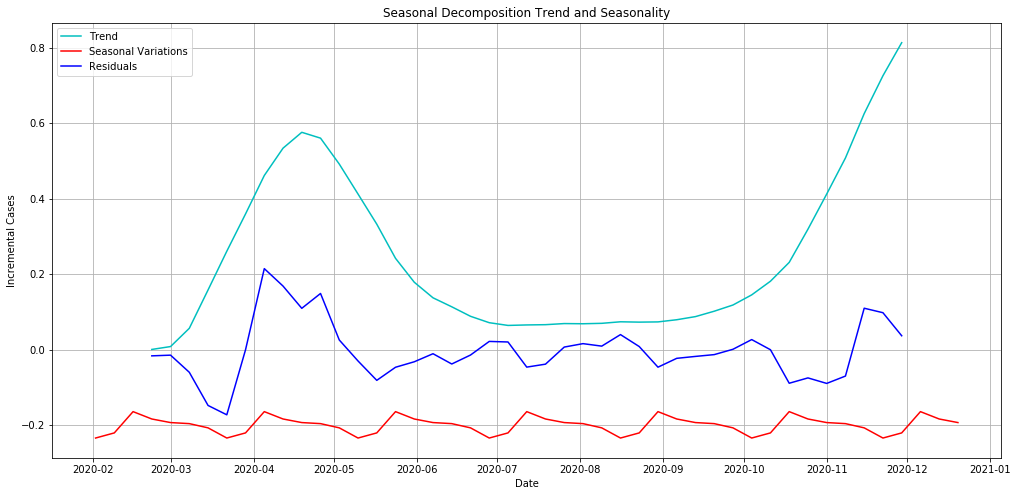

In [10]:
plt.figure(figsize=(17,8))
plt.title('Seasonal Decomposition Trend and Seasonality')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(sd.trend, 'c', label='Trend')
plt.plot(sd.seasonal - 0.2, 'r', label="Seasonal Variations")
plt.plot(sd.resid, 'b', label='Residuals')
plt.legend(loc='best')
plt.grid(True)
plt.show()

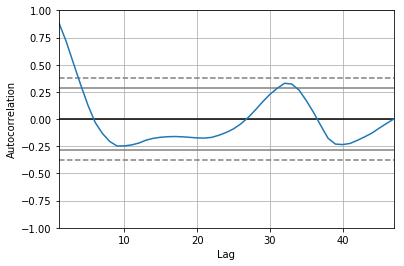

In [11]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(state_covid_cases)
plt.show()

## EM3.2 Prepare the model for ARIMA by dividing the data into train and test and run ARIMA model on train dataset


### Divide into training and test sets


In [12]:
train = state_covid_cases[:'2020-11-1']
test  = state_covid_cases['2020-11-2':]

In [13]:
test.shape

(7,)

### ARIMA Model


                              ARIMA Model Results                              
Dep. Variable:     D.Incremental Cases   No. Observations:                   39
Model:                  ARIMA(4, 1, 2)   Log Likelihood                  48.605
Method:                        css-mle   S.D. of innovations              0.066
Date:                 Sat, 20 Mar 2021   AIC                            -81.211
Time:                         16:33:54   BIC                            -67.902
Sample:                     02-09-2020   HQIC                           -76.436
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0068      0.020      0.346      0.729      -0.032       0.045
ar.L1.D.Incremental Cases     1.1875      0.173      6.863      0.000       0.

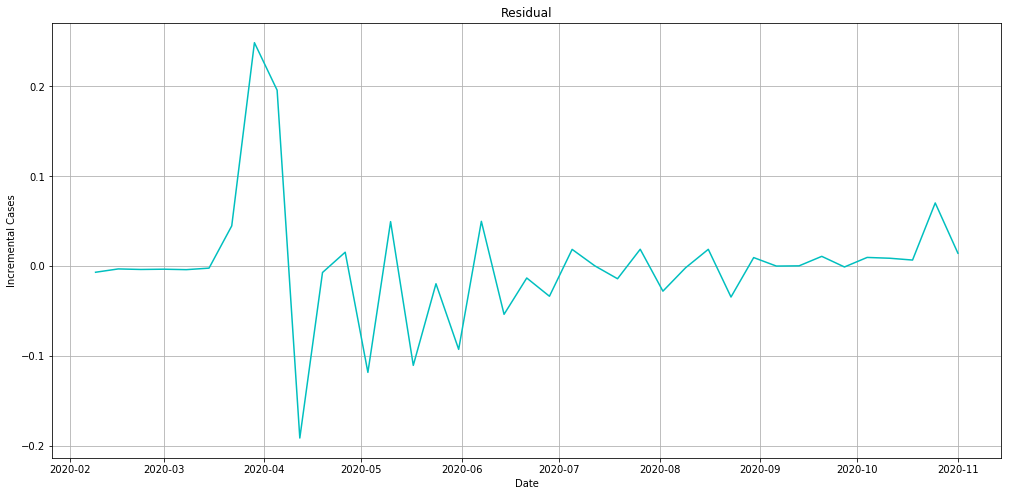

In [14]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train, order=(4,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(17,8))
plt.title('Residual')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(residuals, 'c', label='Residuals')
plt.grid(True)
plt.show()
#residuals.plot()
#residuals.plot(kind='kde')
#plt.show()
#print(residuals.describe())

## EM3.3		Test ARIMA Results on test cases and plot results

predicted=0.353727, expected=0.441449
predicted=0.524096, expected=0.727509
predicted=0.921206, expected=0.788980
predicted=0.765234, expected=0.829066
predicted=0.903941, expected=1.000000
predicted=1.050873, expected=0.962598
predicted=0.894907, expected=0.942186
Test MSE: 0.013


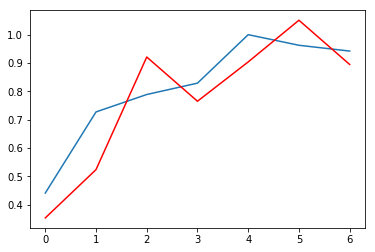

In [15]:
train_m = train.values
test_m = test.values
history = [x for x in train_m]
predictions = []
for t in range(len(test_m)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_m[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test_m)
plt.plot(predictions, color='red')
plt.show()

In [16]:
print("Number of test cases: ", len(test_m))
print("Index \t Observation")
for t in range(2,len(test_m)):
  observation = test_m[t]
  print(t, "\t", observation)

Number of test cases:  7
Index 	 Observation
2 	 0.7889800011798714
3 	 0.8290661317916347
4 	 1.0
5 	 0.9625980768096277
6 	 0.9421863016931155


In [17]:
print(test_m)

[0.44144888 0.7275087  0.78898    0.82906613 1.         0.96259808
 0.9421863 ]


In [18]:
history

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001474839242522565,
 0.002743200991091971,
 0.05356616128841956,
 0.3383871158043773,
 0.711432953808035,
 0.7180992271842369,
 0.6917291015279334,
 0.7127603091263053,
 0.509674945430948,
 0.3477080998171199,
 0.23013391540322106,
 0.23066485753052918,
 0.1623798006017344,
 0.13294200932098402,
 0.07911037696891039,
 0.06651524983776769,
 0.05863960828269719,
 0.06350657778302166,
 0.054569051973334906,
 0.043596248008967026,
 0.08232552651760958,
 0.08810689634829803,
 0.0714707096926435,
 0.07911037696891039,
 0.0601439443100702,
 0.062444693528405405,
 0.07211963895935343,
 0.07604271134446346,
 0.09226594301221167,
 0.11167482744380862,
 0.1372485399091499,
 0.1600790513833992,
 0.17754114801486637,
 0.2601911391658309,
 0.329213615715887,
 0.4414488820718542,
 0.7275087015515309,
 0.7889800011798714,
 0.8290661317916347,
 1.0,
 0.9625980768096277,
 0.9421863016931155]

## EM3.4		Take another state from the State Analytics Base table and repeat - CLASS ASSIGNMENT


### filter data for CA state

In [19]:
df_abt_chosen_state = df_abt_by_state[df_abt_by_state['State'] == 'CA']
df_abt_chosen_state = df_abt_chosen_state.dropna()
df_abt_chosen_state

,Unnamed: 0,State,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,,
2020-01-29,16039,CA,6,4,1.0,0.571429,0,0.0,0.000000
2020-01-30,16040,CA,6,4,0.0,0.571429,0,0.0,0.000000
2020-01-31,16041,CA,6,4,0.0,0.571429,0,0.0,0.000000
2020-02-01,16042,CA,6,4,0.0,0.571429,0,0.0,0.000000
2020-02-02,16043,CA,6,4,0.0,0.285714,0,0.0,0.000000
2020-02-03,16044,CA,6,6,2.0,0.428571,0,0.0,0.000000
2020-02-04,16045,CA,6,6,0.0,0.428571,0,0.0,0.000000
2020-02-05,16046,CA,6,6,0.0,0.285714,0,0.0,0.000000
2020-02-06,16047,CA,6,6,0.0,0.285714,1,1.0,0.142857


### Compute weekly summaries

In [20]:
df_abt_chosen_state_weekly = df_abt_chosen_state.resample('W').sum()
df_abt_chosen_state_weekly


,Unnamed: 0,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,
2020-02-02,80205,30,20,1.0,2.571429,0,0.0,0.000000
2020-02-09,112329,42,42,2.0,2.285714,4,1.0,0.571429
2020-02-16,112378,42,52,2.0,1.428571,7,0.0,0.428571
2020-02-23,112427,42,71,4.0,2.714286,14,1.0,1.000000
2020-03-01,112476,42,119,10.0,6.857143,14,0.0,0.000000
2020-03-08,112525,42,503,109.0,54.857143,22,2.0,1.142857
2020-03-15,112574,42,2528,490.0,289.285714,48,5.0,3.714286
2020-03-22,112623,42,9594,1484.0,1009.428571,166,27.0,16.857143
2020-03-29,112672,42,31454,4602.0,3122.857143,616,99.0,64.285714


In [21]:
state_covid_cases = df_abt_chosen_state_weekly['Incremental Cases']
cases_max = state_covid_cases.max()
state_covid_cases = state_covid_cases/cases_max

In [22]:
sd =seasonal_decompose(state_covid_cases,freq=7)

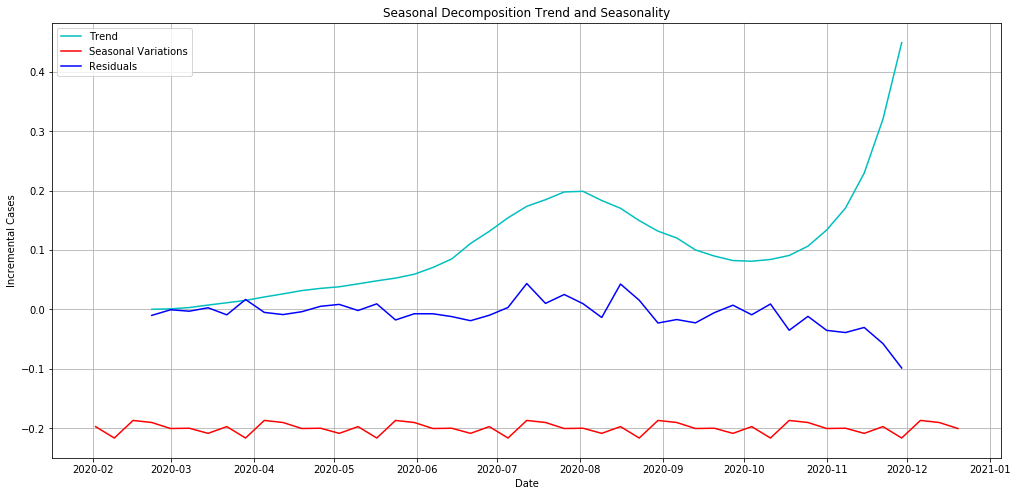

In [23]:
plt.figure(figsize=(17,8))
plt.title('Seasonal Decomposition Trend and Seasonality')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(sd.trend, 'c', label='Trend')
plt.plot(sd.seasonal - 0.2, 'r', label="Seasonal Variations")
plt.plot(sd.resid, 'b', label='Residuals')
plt.legend(loc='best')
plt.grid(True)
plt.show()

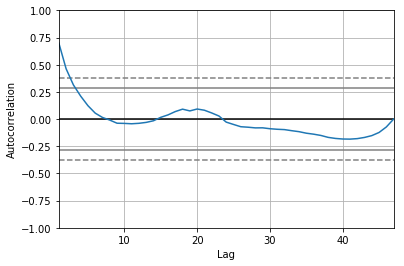

In [24]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(state_covid_cases)
plt.show()

In [25]:
train = state_covid_cases[:'2020-11-1']
test  = state_covid_cases['2020-11-2':]

In [26]:
test.shape

(7,)

                              ARIMA Model Results                              
Dep. Variable:     D.Incremental Cases   No. Observations:                   39
Model:                  ARIMA(4, 1, 2)   Log Likelihood                  96.916
Method:                        css-mle   S.D. of innovations              0.019
Date:                 Sat, 20 Mar 2021   AIC                           -177.833
Time:                         16:34:40   BIC                           -164.524
Sample:                     02-09-2020   HQIC                          -173.058
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0038      0.002      2.507      0.012       0.001       0.007
ar.L1.D.Incremental Cases     0.2867      0.204      1.407      0.160      -0.

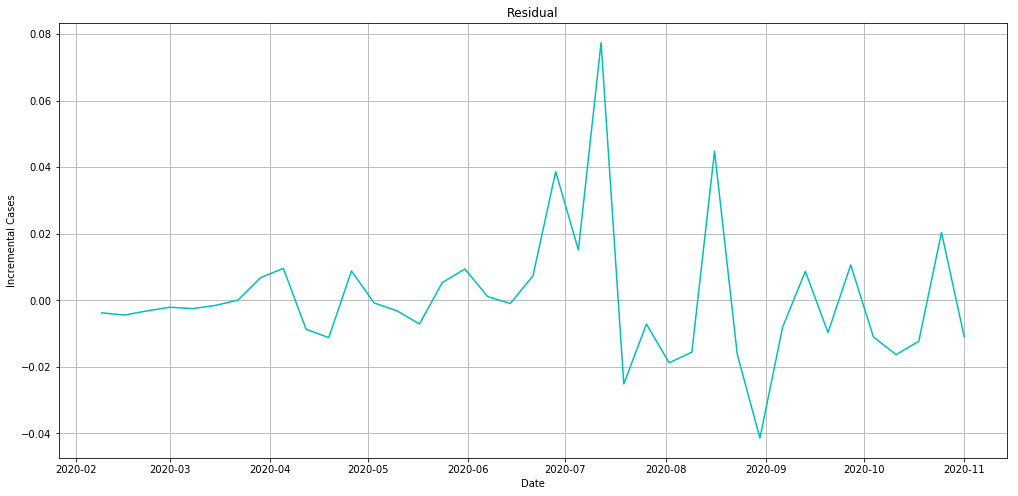

In [27]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train, order=(4,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(17,8))
plt.title('Residual')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(residuals, 'c', label='Residuals')
plt.grid(True)
plt.show()

predicted=0.114020, expected=0.131818
predicted=0.139712, expected=0.190657
predicted=0.192074, expected=0.265744
predicted=0.319993, expected=0.334245
predicted=0.392013, expected=0.481761
predicted=0.563266, expected=0.740530
predicted=0.973702, expected=1.000000
Test MSE: 0.007


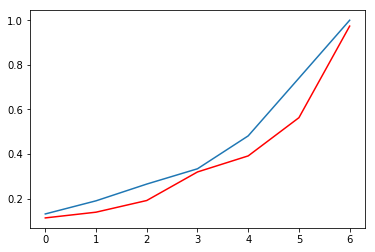

In [28]:
train_m = train.values
test_m = test.values
history = [x for x in train_m]
predictions = []
for t in range(len(test_m)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_m[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test_m)
plt.plot(predictions, color='red')
plt.show()

In [29]:
print("Number of test cases: ", len(test_m))
print("Index \t Observation")
for t in range(2,len(test_m)):
  observation = test_m[t]
  print(t, "\t", observation)

Number of test cases:  7
Index 	 Observation
2 	 0.26574375035936915
3 	 0.33424542628789444
4 	 0.4817609594902201
5 	 0.7405304119300405
6 	 1.0


In [30]:
print(test_m)

[0.13181829 0.19065674 0.26574375 0.33424543 0.48176096 0.74053041
 1.        ]


## EM3.5 		Pick a county and repeat this exercise for the chosen county - CLASS ASSIGNMENT	

In [31]:
if using_Google_colab:             
    df_abt_by_county = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/abt_by_county.csv',
                                  index_col=['Date'], parse_dates=['Date'])
if using_Anaconda_on_Mac_or_Linux:
    df_abt_by_county = pd.read_csv('../output/abt_by_county.csv',
                                  index_col=['Date'], parse_dates=['Date'])
if using_Anaconda_on_windows:
    df_abt_by_county = pd.read_csv('..\output\abt_by_county.csv',
                                  index_col=['Date'], parse_dates=['Date'])
df_abt_by_county

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,County Name,countyFIPS,State,stateFIPS,Total Cases,Incremental Cases,cases moving_average,...,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,334,Kent County,10001,DE,10,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,1,335,Kent County,10001,DE,10,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,2,2,336,Kent County,10001,DE,10,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,3,3,337,Kent County,10001,DE,10,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,4,4,338,Kent County,10001,DE,10,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,5,5,339,Kent County,10001,DE,10,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,6,6,340,Kent County,10001,DE,10,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,7,7,341,Kent County,10001,DE,10,0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,8,8,342,Kent County,10001,DE,10,0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_abt_chosen_county = df_abt_by_state[df_abt_by_state['County'] == 'Los Angeles County']
df_abt_chosen_county = df_abt_chosen_county.dropna()
df_abt_chosen_county

KeyError: 'County'

In [ ]:
df_abt_chosen_county_weekly = df_abt_chosen_county.resample('W').sum()
df_abt_chosen_county_weekly

In [ ]:
county_covid_cases = df_abt_chosen_county_weekly['Incremental Cases']
cases_max = county_covid_cases.max()
county_covid_cases = county_covid_cases/cases_max

In [ ]:
sd =seasonal_decompose(state_covid_cases,freq=7)

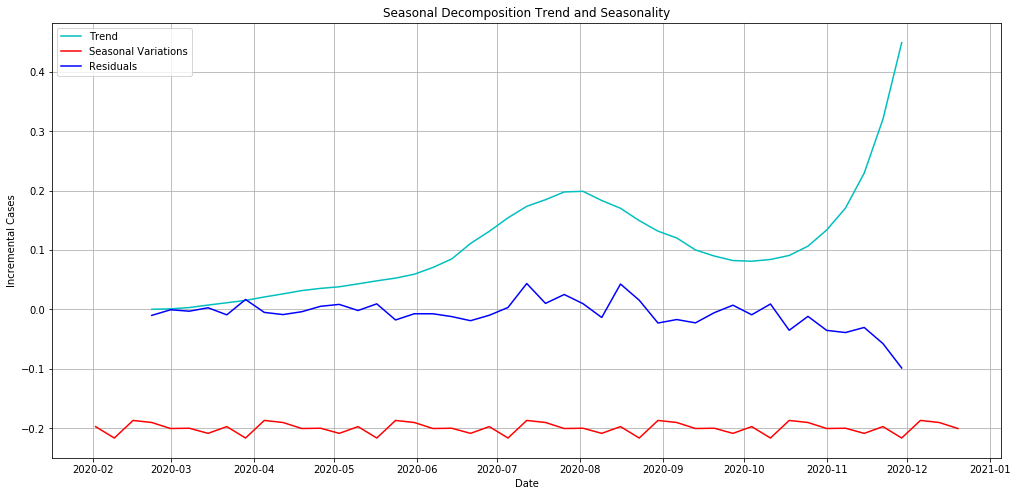

In [33]:
plt.figure(figsize=(17,8))
plt.title('Seasonal Decomposition Trend and Seasonality')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(sd.trend, 'c', label='Trend')
plt.plot(sd.seasonal - 0.2, 'r', label="Seasonal Variations")
plt.plot(sd.resid, 'b', label='Residuals')
plt.legend(loc='best')
plt.grid(True)
plt.show()

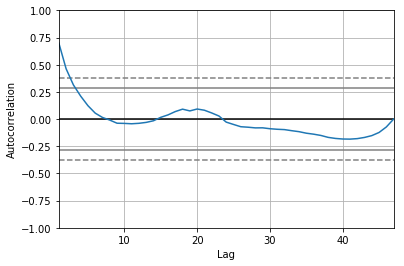

In [34]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(state_covid_cases)
plt.show()

In [35]:
test.shape

(7,)

                              ARIMA Model Results                              
Dep. Variable:     D.Incremental Cases   No. Observations:                   39
Model:                  ARIMA(4, 1, 2)   Log Likelihood                  96.916
Method:                        css-mle   S.D. of innovations              0.019
Date:                 Sat, 20 Mar 2021   AIC                           -177.833
Time:                         16:35:05   BIC                           -164.524
Sample:                     02-09-2020   HQIC                          -173.058
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0038      0.002      2.507      0.012       0.001       0.007
ar.L1.D.Incremental Cases     0.2867      0.204      1.407      0.160      -0.

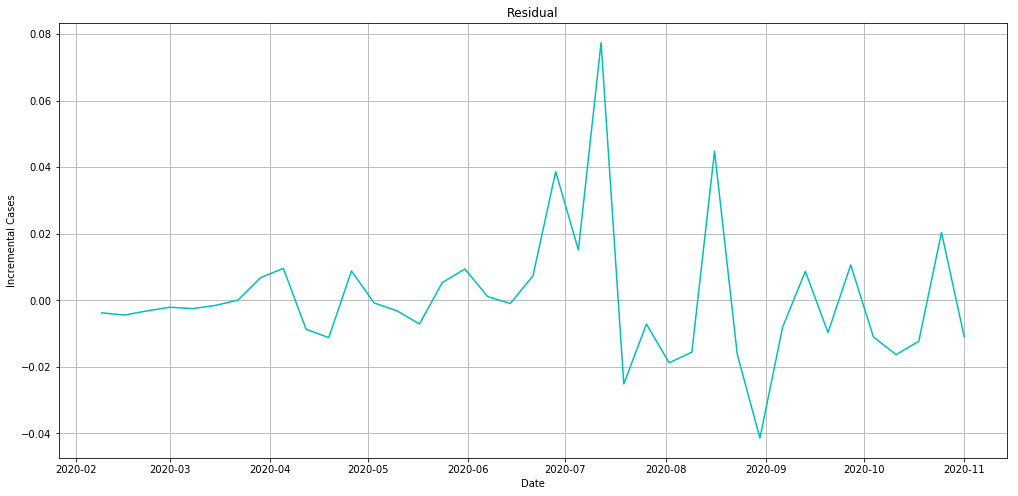

In [36]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train, order=(4,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(17,8))
plt.title('Residual')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(residuals, 'c', label='Residuals')
plt.grid(True)
plt.show()

predicted=0.114020, expected=0.131818
predicted=0.139712, expected=0.190657
predicted=0.192074, expected=0.265744
predicted=0.319993, expected=0.334245
predicted=0.392013, expected=0.481761
predicted=0.563266, expected=0.740530
predicted=0.973702, expected=1.000000
Test MSE: 0.007


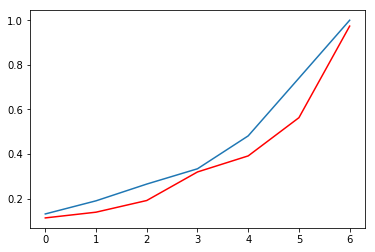

In [37]:
train_m = train.values
test_m = test.values
history = [x for x in train_m]
predictions = []
for t in range(len(test_m)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_m[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test_m)
plt.plot(predictions, color='red')
plt.show()

In [38]:
print("Number of test cases: ", len(test_m))
print("Index \t Observation")
for t in range(2,len(test_m)):
  observation = test_m[t]
  print(t, "\t", observation)

Number of test cases:  7
Index 	 Observation
2 	 0.26574375035936915
3 	 0.33424542628789444
4 	 0.4817609594902201
5 	 0.7405304119300405
6 	 1.0


In [39]:
print(test_m)

[0.13181829 0.19065674 0.26574375 0.33424543 0.48176096 0.74053041
 1.        ]
